In [27]:
from robustness import model_utils, datasets, defaults, train
from robustness.loaders import LambdaLoader
import torch as ch
import torch
import torchvision
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms
import sys
# sys.path.append('../')
from read_data import ChestXrayDataSet
from sklearn.metrics import roc_auc_score
from robustness.tools.vis_tools import show_image_column, show_image_row


In [5]:
N_CLASSES = 14
CLASS_NAMES = [ 'Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pneumonia',
                'Pneumothorax', 'Consolidation', 'Edema', 'Emphysema', 'Fibrosis', 'Pleural_Thickening', 'Hernia']
DATA_DIR = './ChestX-ray14/images'

TRAIN_IMAGE_LIST = './ChestX-ray14/labels/train_list.txt'
VAL_IMAGE_LIST = './ChestX-ray14/labels/val_list.txt'
TEST_IMAGE_LIST = './ChestX-ray14/labels/test_list.txt'

BATCH_SIZE = 4

In [6]:
normalize = transforms.Normalize([0.485, 0.456, 0.406],
                                          [0.229, 0.224, 0.225])
train_dataset = ChestXrayDataSet(data_dir=DATA_DIR,
                                image_list_file=TEST_IMAGE_LIST,
                                transform=transforms.Compose([transforms.RandomResizedCrop(224),
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    normalize
                            ]))
val_dataset = ChestXrayDataSet(data_dir=DATA_DIR,
                                image_list_file=VAL_IMAGE_LIST,
                                transform=transforms.Compose([
                                    transforms.Resize(256),
                                    transforms.TenCrop(224),
                                    transforms.Lambda
                                    (lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
                                    transforms.Lambda
                                    (lambda crops: torch.stack([normalize(crop) for crop in crops]))
                                ]))

test_dataset = ChestXrayDataSet(data_dir=DATA_DIR,
                                image_list_file=TEST_IMAGE_LIST,
                                transform=transforms.Compose([
                                    transforms.Resize(256),
                                    transforms.TenCrop(224),
                                    transforms.Lambda
                                    (lambda crops: torch.stack([transforms.ToTensor()(crop) for crop in crops])),
                                    transforms.Lambda
                                    (lambda crops: torch.stack([normalize(crop) for crop in crops]))
                                ]))

train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, num_workers=80, pin_memory=True)

val_loader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE,
                             shuffle=False, num_workers=80, pin_memory=True)

test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE,
                             shuffle=False, num_workers=80, pin_memory=True)


## Training Set

In [22]:
[f'\n'.join([CLASS_NAMES[i] for i,exist in enumerate(yi) if exist]) for yi in y]

['Infiltration\nPneumothorax', '', '', 'Atelectasis']

In [37]:
len(X.split(4))

1

CPU times: user 3 µs, sys: 4 µs, total: 7 µs
Wall time: 11.4 µs


RuntimeError: number of dims don't match in permute

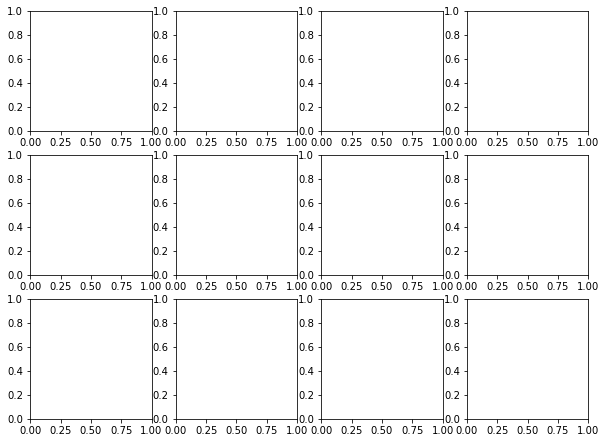

In [32]:
%time
# # _, (X,y) = next(enumerate(train_loader))
# _, (X,y) = next(enumerate(train_loader))

# plt.figure(figsize=(20,10))
# grid = torchvision.utils.make_grid(X, nrow=8)

# plt.imshow(grid.permute(1,2,0))
show_image_column(X.split(X.shape[0], dim=0)[0], 
                  [f'\n'.join([CLASS_NAMES[i] for i,exist in enumerate(yi) if exist]) for yi in y])


In [19]:
y

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
X.shape

torch.Size([4, 3, 224, 224])

# Validation Set

In [ ]:
%time
# _, (X,y) = next(enumerate(train_loader))
_, (X,y) = next(enumerate(train_loader))

plt.figure(figsize=(20,10))
grid = torchvision.utils.make_grid(X, nrow=8)

plt.imshow(grid.permute(1,2,0))